# Logistic Regression

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('bank-full.csv')

In [59]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
data['y'].value_counts() # number of clients who haven't subscribed to a term deposit are much larger to those who have cauisng biasness

no     39922
yes     5289
Name: y, dtype: int64

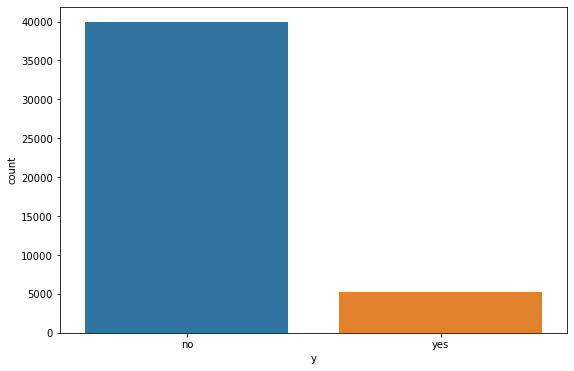

<AxesSubplot:ylabel='y'>

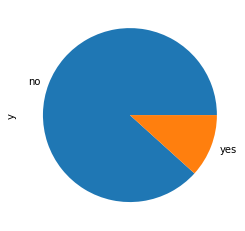

In [62]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='y',data=data)
plt.show()
plt.savefig('count_plot')
fig.add_subplot(1,2,2)
data["y"].value_counts(normalize=True).plot.pie()

In [63]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [64]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [65]:
data[categorical].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [66]:
# check for cardinality(number of labels present inside a category) in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

job  contains  12  labels
marital  contains  3  labels
education  contains  4  labels
default  contains  2  labels
housing  contains  2  labels
loan  contains  2  labels
contact  contains  3  labels
month  contains  12  labels
poutcome  contains  4  labels
y  contains  2  labels


In [67]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder

le = LabelEncoder()

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']

# Encode labels of multiple columns at once

data[cols] = data[cols].apply(LabelEncoder().fit_transform)

# Print head

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


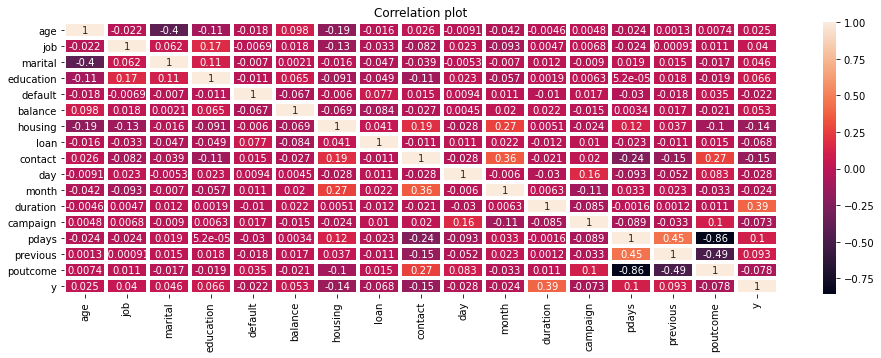

In [68]:
plt.figure(figsize = (16,5))
corr_plot = sns.heatmap(data.corr(),annot = True,linewidths=3)
plt.title("Correlation plot")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
y = data.pop("y")
X = data

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.8)

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (36168, 16)
train size y :  (36168,)
test size X :  (9043, 16)
test size y :  (9043,)


In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\Tripti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
y_pred= classifier.predict(X_test)

In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [92]:
df= pd.DataFrame({'actual':y_test,'predicted_prob':y_pred})
df

,actual,predicted_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,0


In [93]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[7855  125]
 [ 919  144]]


In [94]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.54      0.14      0.22      1063

    accuracy                           0.88      9043
   macro avg       0.72      0.56      0.58      9043
weighted avg       0.85      0.88      0.85      9043



In [95]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8845515868627668
Precision: 0.5353159851301115
Recall: 0.1354656632173095
f1score: 0.2162162162162162


Text(0, 0.5, 'True Positive Rate')

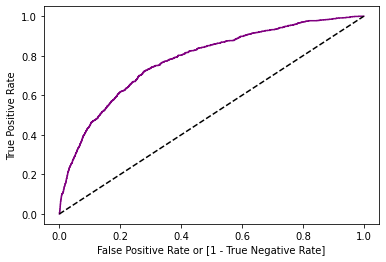

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='purple', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [97]:
auc

0.5599007514081534

# Hyperparameter Tuning 

In [98]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.891921 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.891727 (0.003442) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.891727 (0.003471) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.888124 (0.002551) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.891571 (0.003356) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.891755 (0.003484) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.891746 (0.003415) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887949 (0.002427) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.891525 (0.003371) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with:

C:\Users\Tripti\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


So from above results we can see that the best result can be obtained by using the L2 regularization using newton-cg solver

In [99]:
classifier2 = LogisticRegression(penalty='l2', solver='newton-cg',max_iter=1000)
classifier2.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [100]:
y_pred2= classifier2.predict(X_test)

In [101]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,y_pred2)
print (confusion_matrix2)

[[7803  177]
 [ 834  229]]


In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])

auc2 = roc_auc_score(y_test, y_pred2)
auc2

0.5966237913692981

In [104]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("f1score:",metrics.f1_score(y_test, y_pred2))

Accuracy: 0.8882008183125069
Precision: 0.5640394088669951
Recall: 0.2154280338664158
f1score: 0.3117767188563648


Text(0, 0.5, 'True Positive Rate')

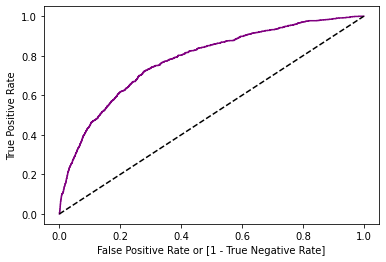

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr2, tpr2, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])

auc2 = roc_auc_score(y_test, y_pred2)

import matplotlib.pyplot as plt
plt.plot(fpr2, tpr2, color='purple', label='logit model ( area  = %0.2f)'%auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [106]:
auc2

0.5966237913692981

In [107]:
d2={'classifier':['classifier','classifier2'], 'Auc':[roc_auc_score(y_test, y_pred), roc_auc_score(y_test, y_pred2)], 'f1_score':[metrics.f1_score(y_test, y_pred), metrics.f1_score(y_test, y_pred2)]}
df2 =pd.DataFrame(d2)
df2

,classifier,Auc,f1_score
0,classifier,0.559901,0.216216
1,classifier2,0.596624,0.311777
